<a href="https://colab.research.google.com/github/grandfatherr/Income-Classification-challenge/blob/main/The_Atomics(Income_classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **THE ATOMIC PROJECT DETAILS**

THE ATOMIC PROJECT MEMEBERS

    1. NORAH EKUTTAN - TEAM LEAD

    2. EDWIN MUTUMA

    3. RAPHAEL BLAIZE

    4. NJOKI MBUGUA

    5. EZRA MAGETO


---



**INCOME EVALUATION**

---

> MAIN OBJECTIVE.
    
The objective of this project is to come up with a model that best predicts the income class an individual falls in, based on a number of factors as accurately as possible.

> SPECIFIC OBJECTIVES

        1. Evaluate the effects of gender on the income levels of an individual.
        2. Evaluate how race, given the recent outcry on social media, affects income and whether there is a disparity in the income levels among different races.
        3. Examine if and how education levels affect the class of income an individual falls in.
        4. Examine whether being in the armed forces is an incentive given they are exempted from paying taxes and how this differs from civilians.
        5. Examine the disparity of incomes given the different work classes and sectors of employment.
        6. Define the relationship between age and income and whether age has anything to do with the incomes people have.
        7. Examine how an individual’s nativity affects their income levels and how this compares to the atmosphere on the ground in the United States given their policies with respect to immigration.
        8. Identify the features that are most relevant in predicting the income class an individual finds themselves in.


# **DATASETS USED IN THIS ANALYSIS**

DATASET FILES:
1.   Variable Definitions: [Link](http://cseweb.ucsd.edu/classes/sp15/cse190-c/reports/sp15/048.pdf)
2.   Dataset: [link](https://www.kaggle.com/lodetomasi1995/income-classification) 








## **UNDERSTANDING MY PROBLEM AND WHAT EXCATLY I AM TRYING TO ANALYZE**


### **DEFINING THE QUESTION**

How can different factors or variables lead individuals to gain different income 

### **DEFINING MY METRIC OF SUCESS**

1) Taking care of my outliers in the dataset

2) EDA for Univariate Analysis and Bi-variate analysis if required and also explain the results

3) Being able to find relationships between variables using stacked column chart in EDA for BI-variate analysis

4) Checking for multicollinearity in-order to drop the right columns


## **DATA SECTION**

### **IMPORTING THE LIBRARIES WE NEED AND LOOKING THROUGH OUR DATASET TO UNDERSTAND IT BETTER**

In [1]:
# Import the necessary libraries we are working with
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns

In [2]:
# Importing the description dataset into our envrionment in-order to understand the columns better
df = pd.read_csv('income_evaluation.csv')

##### INCOME DATASET PREPROCESSING SECTION

In [3]:
# Look at the top of our dataset
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# Look at the bottom of the dataset
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
# Generate a random sample of our data
df.sample()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
21153,46,Private,247286,Some-college,10,Divorced,Sales,Unmarried,White,Female,0,0,40,United-States,<=50K


In [6]:
# Check the records we have 
df.shape

(32561, 15)

In [7]:
# The datatypes we have in our dataset
df.dtypes

age                 int64
 workclass         object
 fnlwgt             int64
 education         object
 education-num      int64
 marital-status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 capital-gain       int64
 capital-loss       int64
 hours-per-week     int64
 native-country    object
 income            object
dtype: object

In [8]:
# Summary of the numerical attributes
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


#### **TAKING CARE OF MISSING VALUES**

In [9]:
# Check for completeness in our data
df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

#### **ENSURING THE DATASET CONTAIN NO DUPLICATE VALUES**


In [10]:
# Check for the consistency in our data
df.duplicated().sum()

24

In [11]:
df.drop_duplicates(keep='first', inplace = True)

In [12]:
df.duplicated().sum()

0

#### **CHECKING THE UNIQUE VALUES IN THE DATASET**

In [13]:
# Looking at the unique values we have in our columns
#for loop to iterate through each column
for column in df.columns:
  columnc = df[column]
  #Printing the column name
  print('Column name:', column)
  #printing the unique values in the column
  print(columnc.unique())
  # printing the number of unique values in the column
  print('Number of unique values in the column:', columnc.nunique())
  print("\n")

Column name: age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
Number of unique values in the column: 73


Column name:  workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
Number of unique values in the column: 9


Column name:  fnlwgt
[ 77516  83311 215646 ...  34066  84661 257302]
Number of unique values in the column: 21648


Column name:  education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
Number of unique values in the column: 16


Column name:  education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
Number of unique values in the column: 16


Column name:  marital-status

Some of the column names include '?'
    
    1. Native-Country
    2. Workclass

> This '?' could have been put there to represent the lack of any content or data in that specific column i will proceed to replace the "?", with NaN and then look through my null values again

In [14]:
# changiing the '?' to NaN in the columns
df.replace(' ?', np.nan, inplace=True)

In [15]:
#cheking the null values in the columns after replacing
df.isnull().sum()

age                   0
 workclass         1836
 fnlwgt               0
 education            0
 education-num        0
 marital-status       0
 occupation        1843
 relationship         0
 race                 0
 sex                  0
 capital-gain         0
 capital-loss         0
 hours-per-week       0
 native-country     582
 income               0
dtype: int64

In [16]:
# Dealing with the missing values in our data
df.dropna(inplace=True)

In [17]:
# Looking for any null values in our data
df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [18]:
# Check the records after dealing with the missing values
df.shape

(30139, 15)

In [19]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,30139.000000,3.013900e+04,30139.000000,30139.000000,30139.000000,30139.000000
mean,38.441720,1.897950e+05,10.122532,1092.841202,88.439928,40.934703
std,13.131426,1.056586e+05,2.548738,7409.110596,404.445239,11.978753
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176275e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784170e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376045e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


#### **CHECKING AND TAKING CARE OF ANY OUTLIERS IN OUR DATASET**

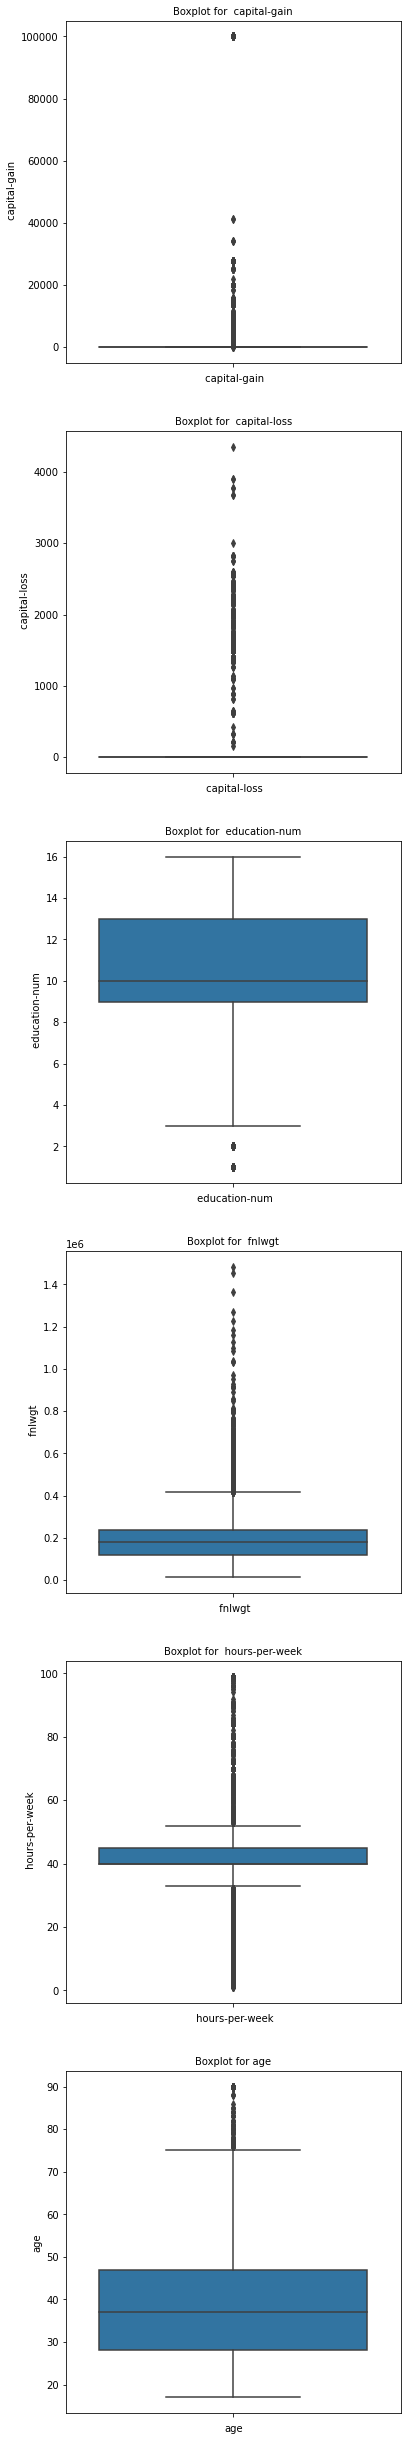

In [20]:
# Checking for outliers for numeric variables
import seaborn as sns
cols = [' capital-gain',' capital-loss',' education-num',' fnlwgt',' hours-per-week','age']

fig, axs = plt.subplots(len(cols), figsize=(6,44))

for i, col_val in enumerate(cols):
    sns.boxplot(y=df[col_val], ax=axs[i])
    axs[i].set_title('Boxplot for '+col_val, fontsize=10)
    axs[i].set_xlabel(col_val, fontsize=10)

In [21]:
# Using the IQR formula
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age                    19.0
 fnlwgt            119977.0
 education-num          4.0
 capital-gain           0.0
 capital-loss           0.0
 hours-per-week         5.0
dtype: float64


In [22]:
#cheking the shape of our dataset before dropping the outliers
df.shape

(30139, 15)

In [23]:
#dropping the outliers in the columns of our dataset
df1 = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df1.shape

(18442, 15)

The shape After dropping the outliers has greatly reduced the size of our dataset so we will keep the outliers as they may hwlp us gain more insight into the data rather than dropping them which may also affect the model's performance when it comes to the modellling section

#### **CHECKING AND LOOKING THROUGH THE VALUE COUNTS OF OUR CAPITAL-LOSS AND CAPITAL-GAIN**

In [24]:
value_count = df[[' capital-loss', ' capital-gain']]

for value in value_count.columns:
  col_cont = value_count[value]
  print("Column Name:", value)
  print(col_cont.value_counts())
  print('\n')

Column Name:  capital-loss
0       28712
1902      194
1977      162
1887      155
1848       50
        ...  
419         1
1411        1
1539        1
2472        1
2467        1
Name:  capital-loss, Length: 90, dtype: int64


Column Name:  capital-gain
0        27601
15024      337
7688       270
7298       240
99999      148
         ...  
401          1
22040        1
4931         1
1455         1
1639         1
Name:  capital-gain, Length: 118, dtype: int64




From the above we checked the value counts of our most interesting columns which was the capital-loss and capital-gain, as we can see from the output that the '0', had the highest value_count, so we will drop this two columns because they wont help us in our analysis if most of the rows contain '0'.This can be explained by the fact that most respondents in census exercise either didn't have stocks or hadn't sold them at that time.

In [25]:
#Dropping the columns
df.drop(columns=[' capital-gain',' capital-loss'],inplace=True)

#Cheking the column names after dropping
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' hours-per-week', ' native-country', ' income'],
      dtype='object')

As we can see from the output the columns specified above have been dropped

### EDA ANALYSIS

#### **PERFORMING UNIVARIATE ANALYSIS** 

#### Numerical variables

In [26]:
#Cheking our column types
df.dtypes

age                 int64
 workclass         object
 fnlwgt             int64
 education         object
 education-num      int64
 marital-status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 hours-per-week     int64
 native-country    object
 income            object
dtype: object

In [27]:
#Choosing only the numerical columns in our datatset
numerical_col = df[['age', ' fnlwgt', ' education-num', ' hours-per-week']]

In the next few cells we will use a for loop to iterate through each of the numerical_col listed above and for each column we will display the various central tendancy and the dispersion of the nummerical columns in-order to gain insight 

##### Measures of central tendancy 

In [28]:
#mean 
for column in df:
  columncontent = df[column]
  if column in numerical_col:
    print('column name', column)
    print('Column mean', columncontent.mean())
    print('\n') 

column name age
Column mean 38.44172003052523


column name  fnlwgt
Column mean 189795.02597962774


column name  education-num
Column mean 10.122532267162148


column name  hours-per-week
Column mean 40.934702544875414




In [29]:
#mode
for column in df:
  columncontent = df[column]
  if column in numerical_col:
    print('column name:', column)
    print('Column mode:', columncontent.mode())
    print('\n') 

column name: age
Column mode: 0    36
dtype: int64


column name:  fnlwgt
Column mode: 0    203488
dtype: int64


column name:  education-num
Column mode: 0    9
dtype: int64


column name:  hours-per-week
Column mode: 0    40
dtype: int64




In [30]:
#median
for column in df:
  columncontent = df[column]
  if column in numerical_col:
    print('column name', column)
    print('Column median:', columncontent.median())
    print('\n') 

column name age
Column median: 37.0


column name  fnlwgt
Column median: 178417.0


column name  education-num
Column median: 10.0


column name  hours-per-week
Column median: 40.0




##### Measures of dispersion

In [31]:
#std
for column in df:
  columncontent = df[column]
  if column in numerical_col:
    print('column name', column)
    print('Column standard deviation:', columncontent.std())
    print('\n') 

column name age
Column standard deviation: 13.131425971315336


column name  fnlwgt
Column standard deviation: 105658.62434055083


column name  education-num
Column standard deviation: 2.548738452612704


column name  hours-per-week
Column standard deviation: 11.97875313756356




In [32]:
#var
for column in df:
  columncontent = df[column]
  if column in numerical_col:
    print('column name', column)
    print('Column variance:', columncontent.var())
    print('\n') 

column name age
Column variance: 172.4343480401349


column name  fnlwgt
Column variance: 11163744897.53764


column name  education-num
Column variance: 6.496067699826599


column name  hours-per-week
Column variance: 143.49052673068883




In [33]:
#skewness
def my_skew():
  for column in df:
    columncontent = df[column]
    if column in numerical_col:
      skew = columncontent.skew()
      if skew > 0:
        print('Positvely skewed')
      elif skew == 0:
        print('Symmetric skew')
      else:
        print('negatively skewed')

      print('column name', column)
      print('Column skew:', skew)
      print('\n') 
#calling
print(my_skew())

Positvely skewed
column name age
Column skew: 0.5289710877265393


Positvely skewed
column name  fnlwgt
Column skew: 1.4600554384907176


negatively skewed
column name  education-num
Column skew: -0.30284490297576744


Positvely skewed
column name  hours-per-week
Column skew: 0.3323859714019701


None


In [34]:
#kurtosis
def kurt():
  for column in df:
    columncontent = df[column]
    if column in numerical_col:
      kurt = columncontent.kurt()
      if kurt > 0:
        print('Leptokurtic kurtosis')
      elif kurt < 0:
        print('platykurtic distribution')
      else:
        print('mesokurtic distribution')

      print('column name', column)
      print('Column kurt:', kurt)
      print('\n') 
#calling
print(kurt())

platykurtic distribution
column name age
Column kurt: -0.14939354317554177


Leptokurtic kurtosis
column name  fnlwgt
Column kurt: 6.397936648888081


Leptokurtic kurtosis
column name  education-num
Column kurt: 0.6385733774168014


Leptokurtic kurtosis
column name  hours-per-week
Column kurt: 3.169360370719343


None


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef28044910>,
      dtype=object)

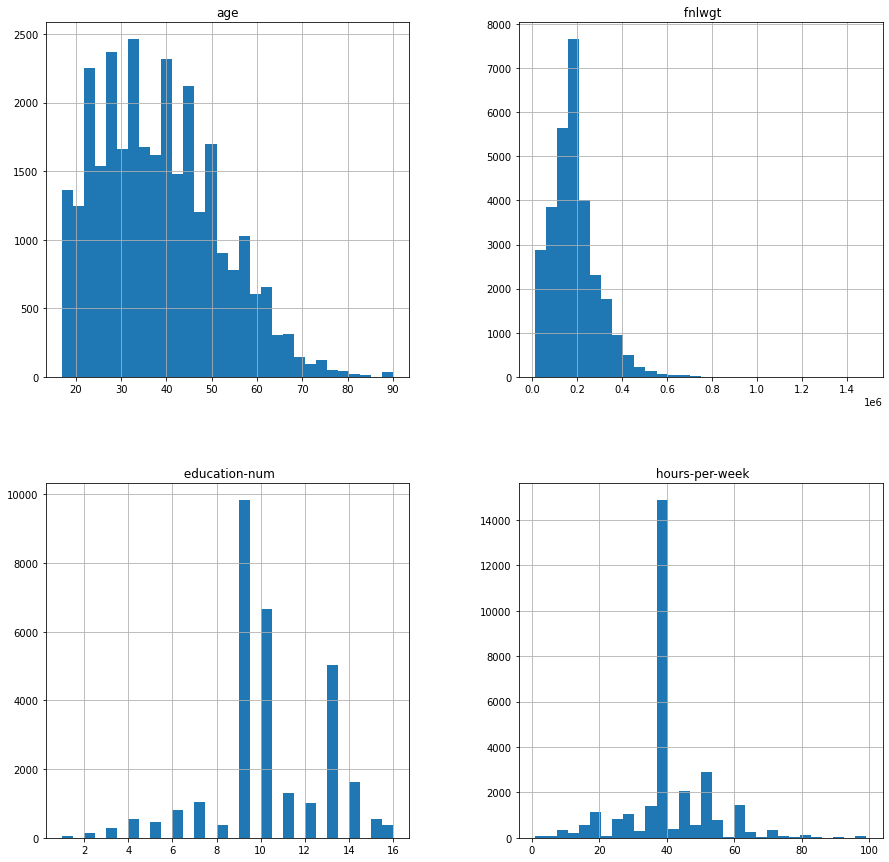

In [35]:
# Look at the distribution of our numerical columns
df.hist(bins=30,figsize=(15,15))

#### Categorical and Categorical 

In [36]:
#Chossing only the categorical columns in our dataset
catg_col = df.select_dtypes(exclude= ['int64'])
catg_col

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


##### Pie chart 

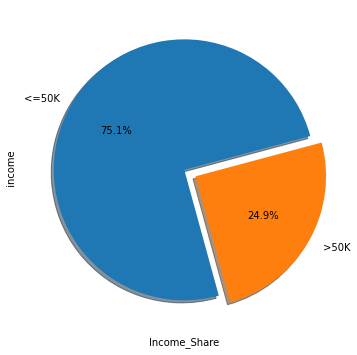

In [37]:
# A pie chart to look at the income(target) variable
plt.figure(figsize=(6,6))
df[' income'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True,startangle=15)
plt.xlabel("Income_Share")
plt.show()

75.1% of the respondents have an income less than or equal to 50,000, while 24.9 % were earning above 50,000 US dollars.

##### Bar charts 

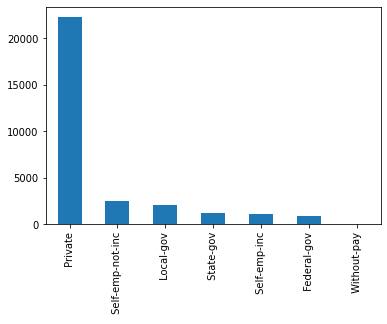

In [38]:
#Bar chart to look at the workclass
df[' workclass'].value_counts().plot(kind='bar')

From the bar chart above we can see that those working in the private sector are more compared to other working classes, this may introduce a sort of bias because we will have more responses from people in this sector.

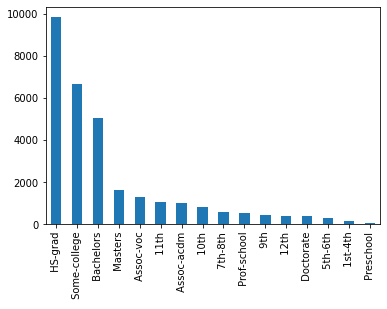

In [39]:
##Bar chart to look at the education
df[' education'].value_counts().plot(kind='bar')

From the bar chart above we can also see that there are more HS-grad and the least number of responses recorded is from preschool.

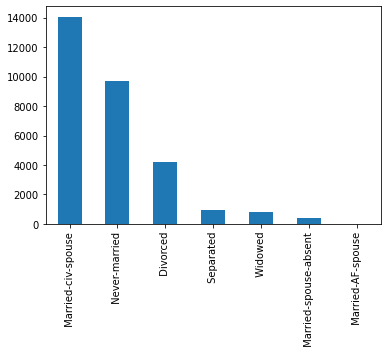

In [40]:
df[' marital-status'].value_counts().plot(kind='bar')

> From the above bar graph we can see that people with civilian spouses are the most respondents

> Least number of respondents have spouses in the Armed forces

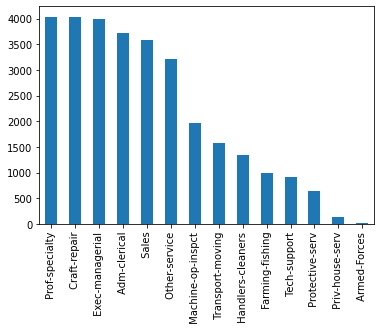

In [41]:
df[' occupation'].value_counts().plot(kind='bar')

> The top occupation for our respondents are 
         
         1. Prof-speciality
         2. Craft-Repair
         3. Exec-Managerial
         4. Admin-clerical
         5. Sales

> The one with the least number of respondents are :
     
         1. Armed-Forces
         2. Priv-house-serve

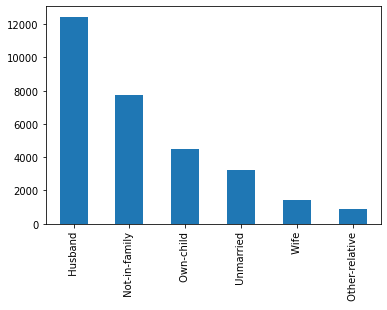

In [42]:
df[' relationship'].value_counts().plot(kind='bar')

> Most of the responses were from Husbands compared to Wives

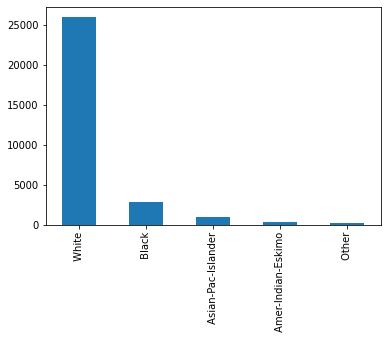

In [43]:
df[' race'].value_counts().plot(kind='bar')

> The reason why there are more white respondents is because the census was done in the US where there are predominatly white people 

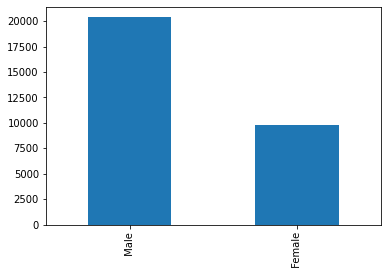

In [44]:
df[' sex'].value_counts().plot(kind='bar')

> There are more male respondents than female

In [45]:
df[' native-country'].value_counts()

 United-States                 27487
 Mexico                          606
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 El-Salvador                     100
 India                           100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 Italy                            68
 China                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        61
 Japan                            59
 Columbia                         56
 Poland                           56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

> The US has the most reposndents compared to other countries followed by: 
    
      1. Mexico
      2. Phillipines
      3. Germany

#### **PERFORMING BIVARIATE ANALYSIS** 

##### pair plot 

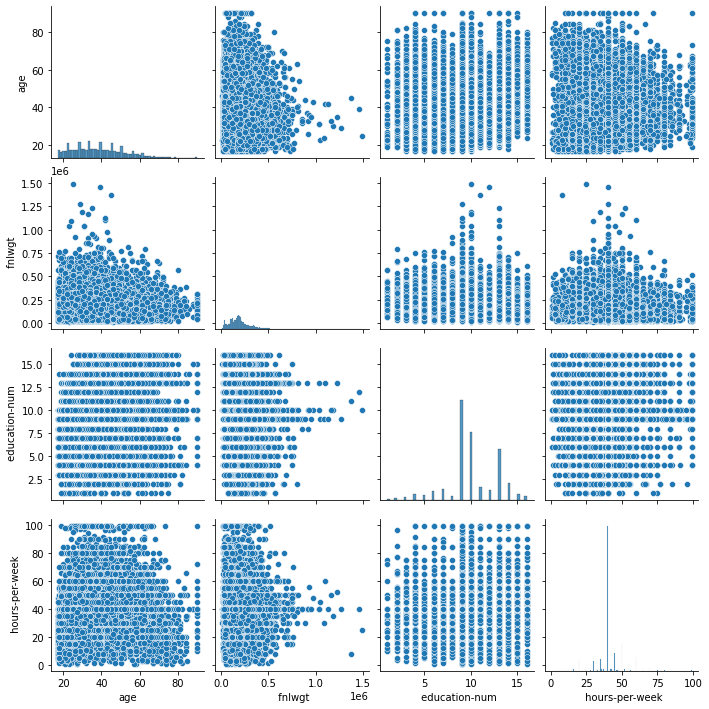

In [46]:
sns.pairplot(df)
plt.show()

##### Heatmap 

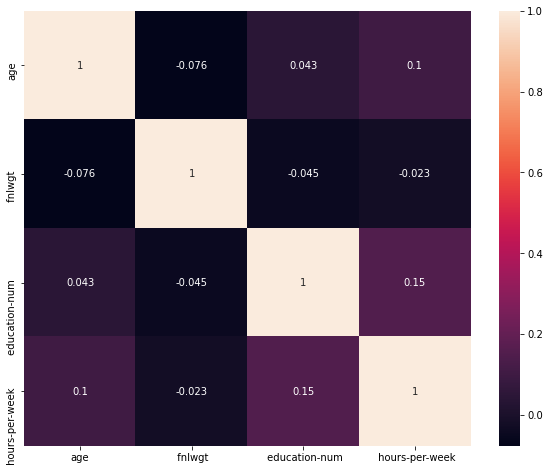

In [47]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot = True)
plt.show()

##### Stacked column chart 

Text(0, 0.5, 'Count')

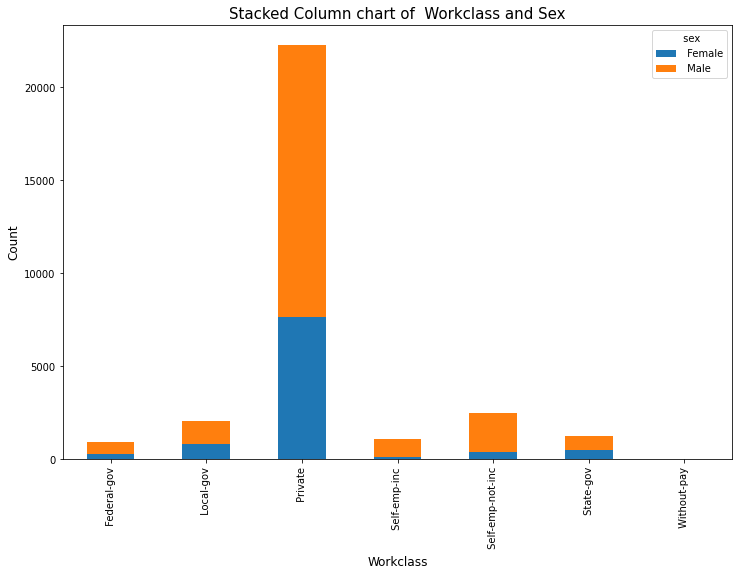

In [48]:
pd.crosstab(df[' workclass'],df[' sex']).plot(kind="bar",stacked=True,figsize=(12,8))
plt.title('Stacked Column chart of  Workclass and Sex',fontsize=(15))
plt.xlabel('Workclass',fontsize=(12))
plt.ylabel('Count',fontsize=(12))

> 1 . Private Sector
        
The private sector empolys the most individuals who responded to the census and the greatest percentage being men of the overall workforce


> 2. The Government

Local Government and the State Government

The Local and State Government have really tried to ensure gender equality in their workforce


Text(0, 0.5, 'Income')

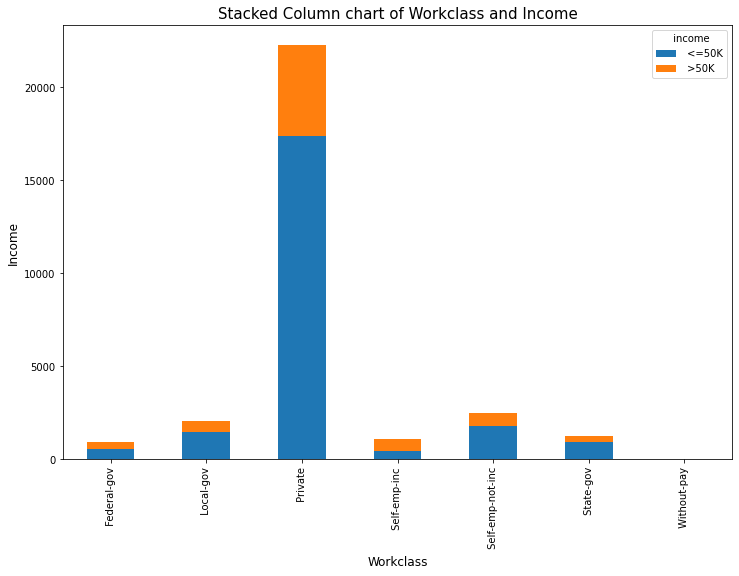

In [49]:
pd.crosstab(df[' workclass'],df[' income']).plot(kind="bar",stacked=True,figsize=(12,8))
plt.title('Stacked Column chart of Workclass and Income',fontsize=(15))
plt.xlabel('Workclass',fontsize=(12))
plt.ylabel('Income',fontsize=(12))

> Overall more people are earning less than $50k, however, the trend seems to shift when it comes to self-employed with an income, this might explain why self-employment has continued to thrive over the years

##### Bar charts of varibales in relation to income

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


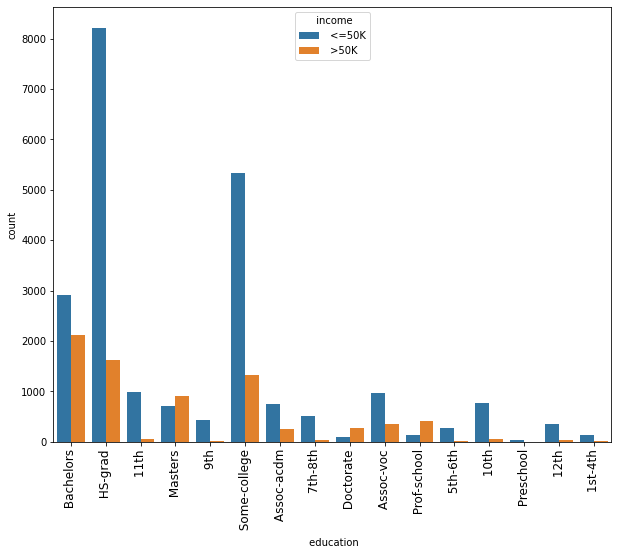

In [50]:
plt.figure(figsize=(10,8))
g = sns.countplot(' education', data=df, hue=' income') # a countplot based on the Education column
g.set_xticklabels(g.get_xticklabels(), rotation = 90, fontsize = 12)
plt.show()

> 

> Respondents who have attained a master or a doctorate are at the upper echelon of the society, placing them in class of earners who make more than $50k

> There is also a distinction between the People who have a bachelors and a high school Grad, there are more respondents who earn >$50k who hold a bachelors compared to High school Graduates.

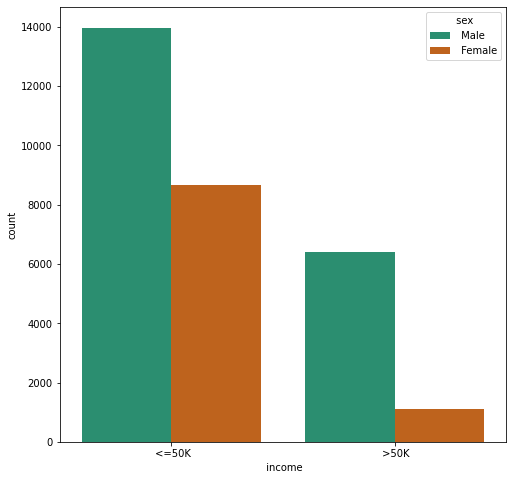

In [51]:
# sex
plt.figure(figsize=(8,8))
sns.countplot(x=' income',hue=' sex',data=df,palette='Dark2')
plt.show()

> There is bias between the male and female earners, we can see that both classes are dominated by the male respondents, with most of the earners above the $50k mark being male.

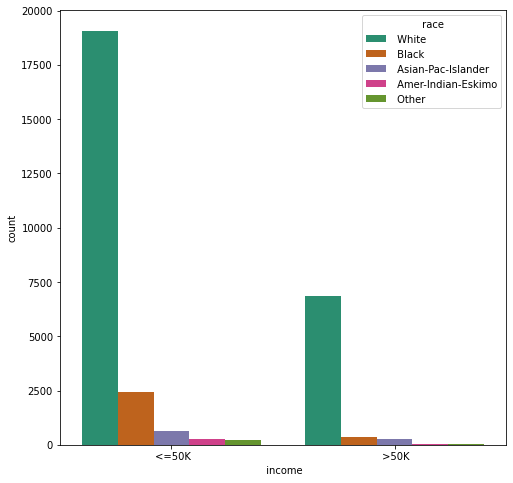

In [52]:
# race
plt.figure(figsize=(8,8))
sns.countplot(x=' income',hue=' race',data=df,palette='Dark2')
plt.show()

>

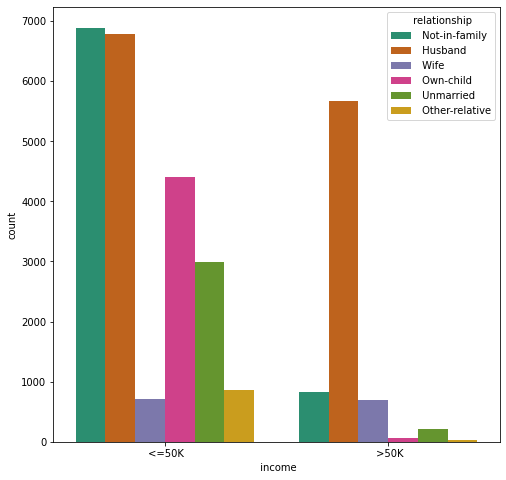

In [53]:
# relationship
plt.figure(figsize=(8,8))
sns.countplot(x=' income',hue=' relationship',data=df,palette='Dark2')
plt.show()

In [54]:
df1 = df[(df[' relationship'] == ' Not-in-family') & (df['age'])]
df1

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,16,Jamaica,<=50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,50,United-States,>50K
28,39,Private,367260,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,80,United-States,<=50K
30,23,Local-gov,190709,Assoc-acdm,12,Never-married,Protective-serv,Not-in-family,White,Male,52,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32505,33,Private,182401,10th,6,Never-married,Adm-clerical,Not-in-family,Black,Male,40,United-States,<=50K
32508,45,Private,155093,10th,6,Divorced,Other-service,Not-in-family,Black,Female,38,Dominican-Republic,<=50K
32544,31,Private,199655,Masters,14,Divorced,Other-service,Not-in-family,Other,Female,30,United-States,<=50K
32546,37,Private,198216,Assoc-acdm,12,Divorced,Tech-support,Not-in-family,White,Female,40,United-States,<=50K


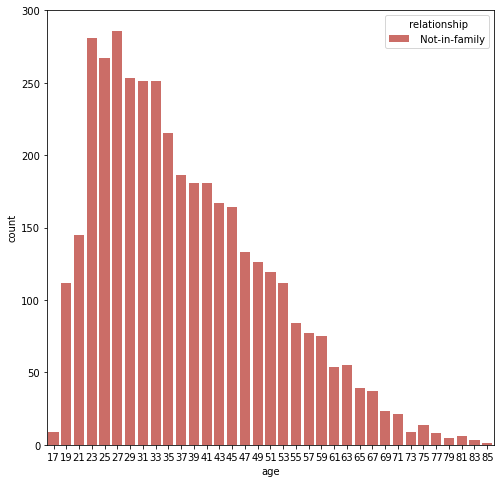

In [55]:
# relationship
plt.figure(figsize=(8,8))
sns.countplot(x='age',hue=' relationship',data=df1,palette='hls')
plt.show()

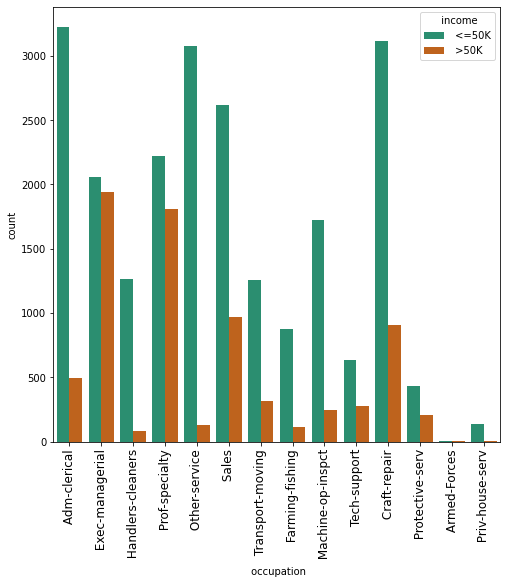

In [56]:
# occupation
plt.figure(figsize=(8,8))
g = sns.countplot(x=' occupation',hue=' income',data=df,palette='Dark2')
g.set_xticklabels(g.get_xticklabels(), rotation = 90, fontsize = 12)
plt.show()

## IMPLEMENTING THE SOLUTION

In [57]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for column in catg_col:
  df[column] = le.fit_transform(df[column].astype(str))
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,5,77516,9,13,4,0,1,4,1,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,40,4,0


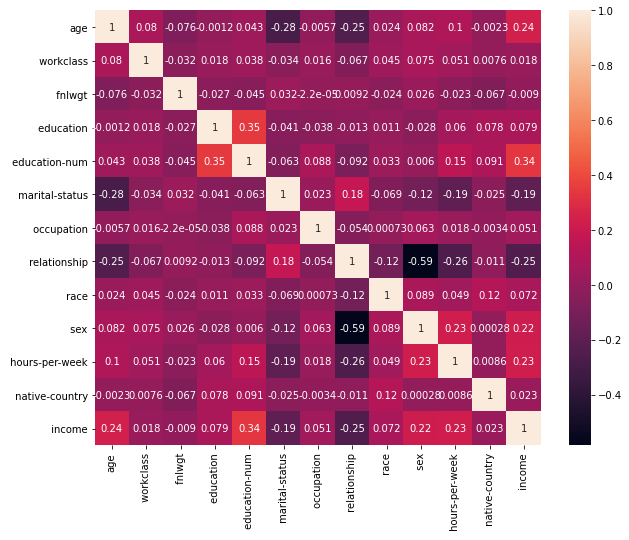

In [58]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [59]:
# VIF (Variable Inflation Factors)
# VIF score of an independent variable represents how well the variable is explained by other independent variables.

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

X = df.iloc[:, 0:12]
calc_vif(X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,variables,VIF
0,age,9.400347
1,workclass,6.245934
2,fnlwgt,4.030447
3,education,9.413415
4,education-num,18.837377
5,marital-status,4.011822
6,occupation,3.204509
7,relationship,2.615791
8,race,18.445405
9,sex,4.592676


In [60]:
x1 = X.drop(columns = [' education-num', ' race'])

In [61]:
calc_vif(x1)

,variables,VIF
0,age,9.076105
1,workclass,6.151022
2,fnlwgt,3.997831
3,education,7.975971
4,marital-status,3.967352
5,occupation,3.135335
6,relationship,2.604711
7,sex,4.534255
8,hours-per-week,12.163803
9,native-country,22.800596


#### **LOGISTIC REGRESSION**

In [62]:
# Getting the features and label
X = x1
y = df.iloc[:, -1].values

In [63]:
# Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [64]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [65]:
# Fitting the model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
# Predicting
y_pred_log = log_reg.predict(X_test)

# Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred_log))
print(accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

[[4258  285]
 [1154  331]]
0.7612806901128069
              precision    recall  f1-score   support

           0       0.79      0.94      0.86      4543
           1       0.54      0.22      0.32      1485

    accuracy                           0.76      6028
   macro avg       0.66      0.58      0.59      6028
weighted avg       0.73      0.76      0.72      6028



Using Logistic Regression our model achieves an accuracy of 76.12%

##### HYPERPARAMETER TUNING AND CROSS VALIDATION

In [67]:
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = log_reg, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
# Getting the variance in the accuracies so we will print the sd
print("Standard Deviation of the cross validation: {:.2f} %".format(accuracies.std()*100))
print("\n")

# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
#we are going to have two dictionaries in the list because the gamma parameter can only be used with a rbf kernel 
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'solver':['newton-cg', 'lbfgs', 'sag'], 'multi_class': ['auto', 'ovr', 'multinomial']}]

#finding the accuracy on the 10 test folds
#the n_jobs is to set all your process to run the grid search
grid_search = GridSearchCV(estimator=log_reg, param_grid=parameters, scoring='accuracy',
                           cv = 10, n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("ACCURACY AFTER 10 TEST FOLDS AND THE BEST PARAMETERS")
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Accuracy: 75.66 %
Standard Deviation of the cross validation: 0.78 %


ACCURACY AFTER 10 TEST FOLDS AND THE BEST PARAMETERS
Best Accuracy: 75.66 %
Best Parameters: {'C': 0.5, 'multi_class': 'multinomial', 'solver': 'newton-cg'}


#### **DECISION TREES**

In [69]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' hours-per-week', ' native-country', ' income'],
      dtype='object')

In [70]:
#Choosing our x and dv 
X = df[['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' hours-per-week', ' native-country']]
y = df[' income']

#splitting into the training set and the test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

# Import Decision Trees
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth = 3, min_samples_split = 20)

# Fit the train onto our model
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [71]:
# Make predictions on the test data
y_pred_tree = dtc.predict(X_test)

# Evaluating the performance of the model
print(confusion_matrix(y_test, y_pred_tree))
print(accuracy_score(y_test, y_pred_tree))

[[4335  208]
 [ 879  606]]
0.8196748506967485


Using just a single tree gives an accuracy of 81.96%



#####VISUALISING 5 TREES IN DESCISION FOREST

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


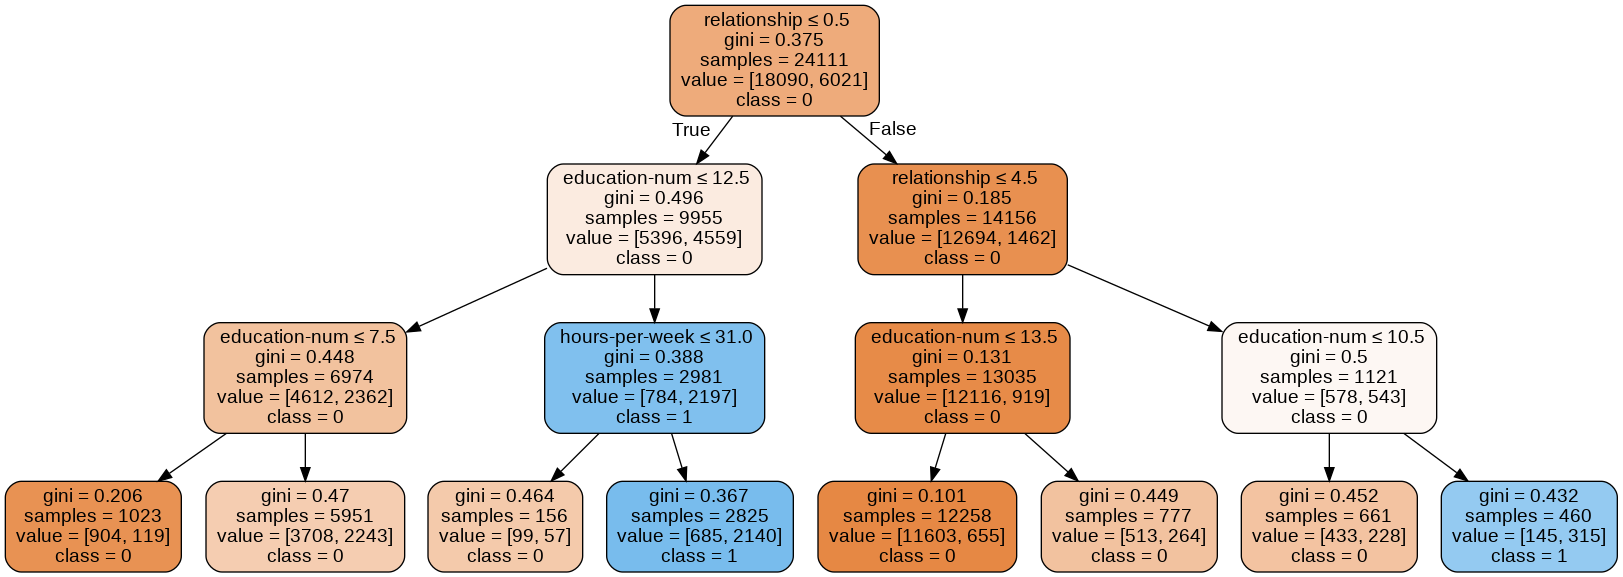

In [72]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('income tree.png')
Image(graph.create_png())

#### **RANDOM FOREST**

In [73]:
# Training the Random Forest classfication model on the training set
from sklearn.ensemble import RandomForestClassifier

#Fitting into the the randomforest classifier
rf = RandomForestClassifier(max_depth = 3, min_samples_split=10, n_estimators=100, criterion='entropy')
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [74]:
# Prediction
y_pred_rf = rf.predict(X_test)

# Evaluating the performance of the model
print(confusion_matrix(y_test, y_pred_rf))
print('*************************')
print('Accuracy of random Forest: ', accuracy_score(y_test, y_pred_rf))

[[4360  183]
 [ 970  515]]
*************************
Accuracy of random Forest:  0.8087259455872594


The accuracy we achieved after using an ensemble method Random Forest was 80.87%

##### FEATURE IMPORTANCE

In [75]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

test_features = df.columns.to_list()
test_features.remove(' income')
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(test_features, importances)]

print(feature_importances) 
print()

# Sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.127), (' workclass', 0.0009), (' fnlwgt', 0.0002), (' education', 0.0388), (' education-num', 0.1649), (' marital-status', 0.1903), (' occupation', 0.0182), (' relationship', 0.3681), (' race', 0.0005), (' sex', 0.0391), (' hours-per-week', 0.0514), (' native-country', 0.0006)]

Variable:  relationship        Importance: 0.3681
Variable:  marital-status      Importance: 0.1903
Variable:  education-num       Importance: 0.1649
Variable: age                  Importance: 0.127
Variable:  hours-per-week      Importance: 0.0514
Variable:  sex                 Importance: 0.0391
Variable:  education           Importance: 0.0388
Variable:  occupation          Importance: 0.0182
Variable:  workclass           Importance: 0.0009
Variable:  native-country      Importance: 0.0006
Variable:  race                Importance: 0.0005
Variable:  fnlwgt              Importance: 0.0002


##### VISUALISING 5 TREES IN RANDOM-FOREST

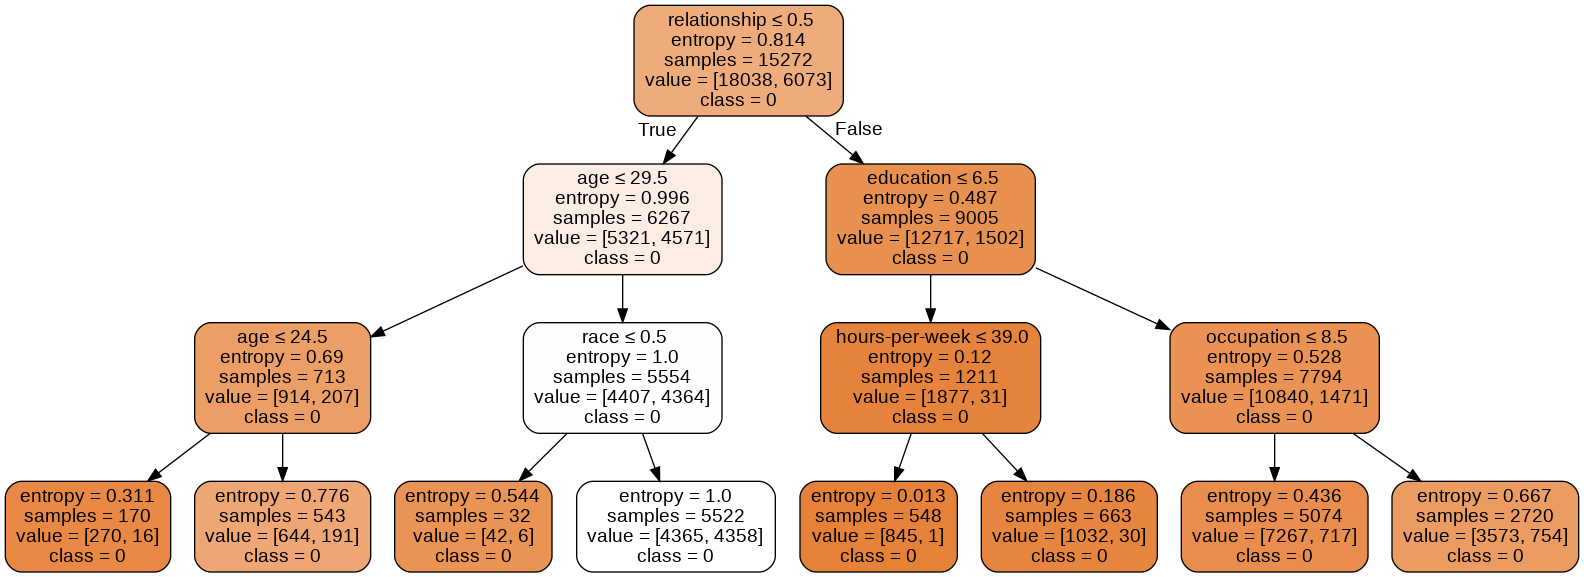

In [76]:
from sklearn.tree import export_graphviz#Visualization of the decision tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()

# picks a specific tree from the forest
tree = rf.estimators_[5]

export_graphviz(tree, out_file = dot_data, filled = True, rounded = True,
                special_characters = True, feature_names = X.columns, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

##### HYPERPARAMETER TUNING AND CROSS VALIDATION

In [77]:
# Performing hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

rf_cv = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
rf_cv.fit(X_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='entropy', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=10,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [78]:
# Getting the best parameters
rf_cv.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [79]:
# Model using the best parameters
rf = RandomForestClassifier(n_estimators = 200, random_state=42, min_samples_split = 20, 
                                max_features= 'sqrt', max_depth=8, criterion='gini')
rf = rf.fit(X_train, y_train)

In [81]:
# Predict based on the model we've trained
y_pred_rf = rf.predict(X_test)

print(confusion_matrix(y_test, y_pred_rf))
print('**********************')
print('accuracy_score:', accuracy_score(y_test, y_pred_rf))

[[4270  273]
 [ 739  746]]
**********************
accuracy_score: 0.8321167883211679


The accuracy achieved after tuning our parameters is 83.21% which is better than what we achieved without tuning the parameters

##### ADA BOOST CLASSIFIER && GRADIENT BOOST

In [82]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
ada = AdaBoostClassifier()
gb = GradientBoostingClassifier()

classifier = [ada, gb]

#Model Names
classifier_name = ['AdaBoost', 'GradientBoost']

for model, name in zip(classifier, classifier_name):
  # Splitting our dataset
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

 #Feature sclaing 
 sc = StandardScaler()
 X_train = sc.fit_transform(X_train)
 X_test = sc.transform(X_test)

 # Training the models 
 model.fit(X_train, y_train)
 y_pred = model.predict(X_test)

 #Getting the metrics
 accuracy = accuracy_score(y_test, y_pred)
 print("The accuracy for:", name, "is", accuracy)
 print("The classification report of:", name)
 print(classification_report(y_test, y_pred))
 print("\n")

The accuracy for: AdaBoost is 0.8334439283344393
The classification report of: AdaBoost
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4543
           1       0.69      0.59      0.64      1485

    accuracy                           0.83      6028
   macro avg       0.78      0.75      0.76      6028
weighted avg       0.83      0.83      0.83      6028



The accuracy for: GradientBoost is 0.8397478433974784
The classification report of: GradientBoost
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      4543
           1       0.71      0.59      0.65      1485

    accuracy                           0.84      6028
   macro avg       0.79      0.76      0.77      6028
weighted avg       0.83      0.84      0.83      6028






>  Adaptive boosting achieved an accuracy of 83.34%

> Gradient boost had an accuracy of 83.97%





##### XGBOOST

In [83]:
import xgboost as xgb

#choosing our x and y 
X = x1
y = df.iloc[:, -1]

In [84]:
#splitting into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

#scaling our values 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Creating and fitting the model
mod = xgb.XGBClassifier()
mod.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [85]:
# Making predictions
y_pred_xgb = mod.predict(X_test)

#evaluating the metrics
print(confusion_matrix(y_test, y_pred_xgb))
print('**********************')
print('accuracy_score:', accuracy_score(y_test, y_pred_xgb))
print('\n')
print(classification_report(y_test, y_pred_xgb))

[[4164  379]
 [ 606  879]]
**********************
accuracy_score: 0.8365958858659589


              precision    recall  f1-score   support

           0       0.87      0.92      0.89      4543
           1       0.70      0.59      0.64      1485

    accuracy                           0.84      6028
   macro avg       0.79      0.75      0.77      6028
weighted avg       0.83      0.84      0.83      6028



XGBoost achieved an accuracy of 83.66%

#### K-NN CLASSIFIER

In [86]:
#choosing our x and y 
X = x1
y = df.iloc[:, -1]

#splitting into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

#scaling our values 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Importing and fitting the Kneighbors
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [87]:
#Predicting the values 
y_pred_knc = knc.predict(X_test)

In [88]:
#evaluating the metrics
print(confusion_matrix(y_test, y_pred_knc))
print('**********************')
print('accuracy_score:', accuracy_score(y_test, y_pred_knc))
print('\n')
print(classification_report(y_test, y_pred_knc))

[[3983  560]
 [ 646  839]]
**********************
accuracy_score: 0.7999336429993364


              precision    recall  f1-score   support

           0       0.86      0.88      0.87      4543
           1       0.60      0.56      0.58      1485

    accuracy                           0.80      6028
   macro avg       0.73      0.72      0.73      6028
weighted avg       0.80      0.80      0.80      6028



##### HYPERPARMETER TUNING AND CROSS VALIDATION OF K-NN

In [89]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = knc, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
# Getting the variance in the accuracies so we will print the sd
print("Standard Deviation of the cross validation: {:.2f} %".format(accuracies.std()*100))
print("\n")

# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
#we are going to have two dictionaries in the list because the gamma parameter can only be used with a rbf kernel 
parameters = [{'n_neighbors': [172, 173, 174, 175], 'weights': ['uniform'], 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'], 'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev']},
              {'n_neighbors': [172, 173, 174, 175], 'weights': ['distance'], 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'], 'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev']}]


#finding the accuracy on the 10 test folds
#the n_jobs is to set all your process to run the grid search
grid_search = GridSearchCV(estimator=knc, param_grid=parameters, scoring='accuracy',
                           cv = 10, n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("ACCURACY AFTER 10 TEST FOLDS AND THE BEST PARAMETERS")
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Accuracy: 80.04 %
Standard Deviation of the cross validation: 0.71 %




/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


ACCURACY AFTER 10 TEST FOLDS AND THE BEST PARAMETERS
Best Accuracy: 82.15 %
Best Parameters: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 173, 'weights': 'distance'}


N_neighbours - We took the sqrt of our √N, it is one way for finding the optima value for K 

Metric - We also checked the metric because it gives us a new persective in our data and also helps us find some hidden information
     
> 1. Manhattan distance is usually preferred over the more common Euclidean distance when there is high dimensionality in the data. Hamming distance is used to measure the distance between categorical variables, and the Cosine distance metric is mainly used to find the amount of similarity between two data points.

Weights 

> The weighted K-NN, means that the nearest k-points are given a weight using the kernel function, the intuition is to give more weights to nearby points and less weights to points which are further away 




#### NAIVE BAYES

In [90]:
##choosing our x and y 
X = x1
y = df.iloc[:, -1]

#splitting into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

#scaling our values 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [91]:
#Training the Naive Bayes model using BernoulliNB
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train, y_train)

#Predicting a new result
y_pred_nb = classifier.predict(X_test)

In [92]:
#looking at the metrics
print(confusion_matrix(y_test,y_pred_nb))

print('-----------------------------------------')
print(accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test,y_pred_nb))

[[3403 1140]
 [ 469 1016]]
-----------------------------------------
0.7330789648307896
              precision    recall  f1-score   support

           0       0.88      0.75      0.81      4543
           1       0.47      0.68      0.56      1485

    accuracy                           0.73      6028
   macro avg       0.68      0.72      0.68      6028
weighted avg       0.78      0.73      0.75      6028



The bernoulli classifier from Naive bayes gives us an accuracy of 73.3%

##### NORMALITY TESTS 

In [93]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' hours-per-week', ' native-country', ' income'],
      dtype='object')

In [94]:
#Anderson-Darling Test
from scipy.stats import anderson
def col_cont():
  for column in df.columns:
    col_cont = df[column]
    # imporing the shapiro function
    result = anderson(col_cont)
    print('Statistic: %.3f' % result.statistic)
    p = 0 
    for i in range(len(result.critical_values)):
      sl, cv = result.significance_level[i], result.critical_values[i]
      if result.statistic < result.critical_values[i]:
        print(column)
        print('%.3f: %.3f, data looks normal' % (sl, cv))
        print('\n')
      else:
        print(column)
        print('%.3f: %.3f, data does not look normal' % (sl, cv))
        print('*******************************************')
        
col_cont()

Statistic: 190.015
age
15.000: 0.576, data does not look normal
*******************************************
age
10.000: 0.656, data does not look normal
*******************************************
age
5.000: 0.787, data does not look normal
*******************************************
age
2.500: 0.918, data does not look normal
*******************************************
age
1.000: 1.092, data does not look normal
*******************************************
Statistic: 4965.938
 workclass
15.000: 0.576, data does not look normal
*******************************************
 workclass
10.000: 0.656, data does not look normal
*******************************************
 workclass
5.000: 0.787, data does not look normal
*******************************************
 workclass
2.500: 0.918, data does not look normal
*******************************************
 workclass
1.000: 1.092, data does not look normal
*******************************************
Statistic: 356.377
 fnlwgt
15.000: 0.576, 

Since our data does not have a gaussian distribution/normal distribution we wound use the GaussianNB for Naive Bayes since our data needs to be normalised

Multinomial Naive Bayes is one of the most popular supervised learning classifications that is used for the analysis of the categorical text data. Text data classification is gaining popularity because there is an enormous amount of information available in email, documents, websites, etc. that needs to be analyzed.


We won't se Multinomial because it is used in text_classification in this case that is not what we are doing in our modelling

#### MLP CLASSIFIER

In [95]:
#chossing our x and dv 
X = x1
y = df.iloc[:, -1]

#splitting into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

#scaling our values 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [96]:
from sklearn.neural_network import MLPClassifier

# Creating our model
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), activation='logistic', random_state=10, max_iter=500)

# fitting the data
mlp.fit(X_train,y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=10, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [97]:
# Predicting
y_pred_mlp = mlp.predict(X_test)

# Evaluation
print(confusion_matrix(y_test,y_pred_mlp))

print('-----------------------------------------')
print(accuracy_score(y_test, y_pred_mlp))
print(classification_report(y_test,y_pred_mlp))

[[4115  428]
 [ 630  855]]
-----------------------------------------
0.8244857332448573
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4543
           1       0.67      0.58      0.62      1485

    accuracy                           0.82      6028
   macro avg       0.77      0.74      0.75      6028
weighted avg       0.82      0.82      0.82      6028



#### ARTIFICIAL NEURAL NETWORKS

In [98]:
#Choosing our x and dv 
X = df[['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' hours-per-week', ' native-country']]
y = df[' income']

import tensorflow as tf

#Spltting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

#Standardizing our data 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [99]:
# creating my ann
ann = tf.keras.models.Sequential()

#Creating my first layer
ann.add(tf.keras.layers.Dense(units = 15, activation = 'relu'))
#Creating my second layer
ann.add(tf.keras.layers.Dense(units = 15, activation = 'relu'))
#Creating my output layer
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [100]:
#compiling my ann
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [101]:
#fiting my ann
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
754/754 [==============================] - 2s 1ms/step - loss: 0.4489 - accuracy: 0.7921
Epoch 2/100
754/754 [==============================] - 1s 1ms/step - loss: 0.3879 - accuracy: 0.8169
Epoch 3/100
754/754 [==============================] - 1s 1ms/step - loss: 0.3753 - accuracy: 0.8212
Epoch 4/100
754/754 [==============================] - 1s 1ms/step - loss: 0.3704 - accuracy: 0.8247
Epoch 5/100
754/754 [==============================] - 1s 1ms/step - loss: 0.3671 - accuracy: 0.8266
Epoch 6/100
754/754 [==============================] - 1s 1ms/step - loss: 0.3652 - accuracy: 0.8279
Epoch 7/100
754/754 [==============================] - 1s 1ms/step - loss: 0.3637 - accuracy: 0.8285
Epoch 8/100
754/754 [==============================] - 1s 1ms/step - loss: 0.3624 - accuracy: 0.8280
Epoch 9/100
754/754 [==============================] - 1s 1ms/step - loss: 0.3616 - accuracy: 0.8288
Epoch 10/100
754/754 [==============================] - 1s 1ms/step - loss: 0.3607 - accura

In [102]:
#predicitng our results 
y_pred_ann = ann.predict(X_test)
y_pred_ann = (y_pred >  0.5)

#metrics
# Evaluation
print(confusion_matrix(y_test,y_pred_ann))
print(accuracy_score(y_test, y_pred_ann))

[[4179  364]
 [ 602  883]]
0.8397478433974784


In [103]:
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                195       
_________________________________________________________________
dense_1 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16        
Total params: 451
Trainable params: 451
Non-trainable params: 0
_________________________________________________________________


In [105]:
# Comparing the model accuracies

performance = {
    'Baseline(Logistic)' :  accuracy_score(y_test, y_pred_log),
              'Decision trees' : accuracy_score(y_test, y_pred_tree),
              'Random forest' : accuracy_score(y_test, y_pred_rf),
              'XGboost' : accuracy_score(y_test, y_pred_xgb),
              'KNN' : accuracy_score(y_test, y_pred_knc),
              'Naive Bayes' : accuracy_score(y_test, y_pred_nb),
              'MLP' : accuracy_score(y_test, y_pred_mlp),
              'ann' :accuracy_score(y_test, y_pred_ann)}
                          

In [108]:
model_perf = pd.DataFrame.from_dict(data=performance, orient='index', columns=['Accuracy Score'])
model_perf.sort_values(by='Accuracy Score', ascending=False)

,Accuracy Score
ann,0.839748
XGboost,0.836596
Random forest,0.832117
MLP,0.824486
Decision trees,0.819675
KNN,0.799934
Baseline(Logistic),0.761281
Naive Bayes,0.733079


**RECOMMENDATIONS**

1. Based on our findings the following are our recommendations:
The private sector needs to come up with ways where they will ensure gender equality in its workforce. The disparity between the number of men working in the private sector and the number of women is very appalling. 

2. Being a self-employed person with an income is relatively a good way of joining the top 25% that makes more than $50k as most people with self employment are the ones grossing high incomes.

3. We’d definitely encourage people to attain higher levels of education as this will give them a competitive advantage over those without a higher degree. This can be exhibited by the fact that most respondents who had obtained a masters, a doctorate and or have attended professional school are at the upper echelon of the society, placing them in the class of earners who make more than $50k. 

4. Some of the occupations that had the highest number of respondents earning more than $50k included executive managerial positions, professional specialty, sales and craft repair. This basically means that most of the top grossers were really good in their respective professions.
